In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df=pd.read_csv("bike_rental_hour.csv")
print(df.columns)
print(df.info())

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [12]:
df["dteday"]=pd.to_datetime(df["dteday"])
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


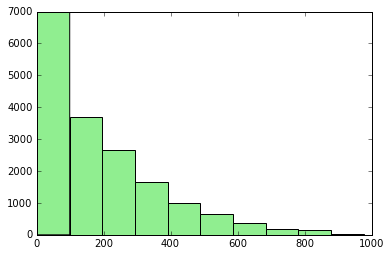

In [15]:
%matplotlib inline

plt.hist(df["cnt"],color="lightgreen")
plt.show()

In [18]:
corr=df.corr()
selected_corr=corr['cnt'].sort_values()
selected_corr

hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
instant       0.278379
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

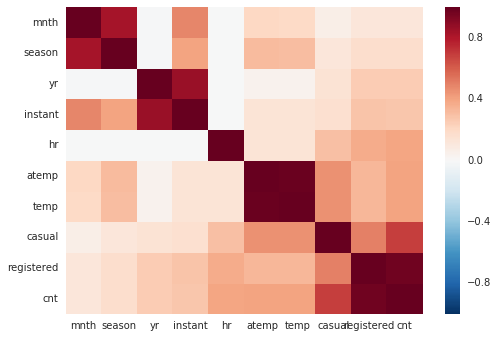

In [22]:
column_corr=selected_corr[selected_corr>0.1]
final_corr=df[column_corr.index].corr()

import seaborn as sns
sns.heatmap(final_corr)

In [24]:
df["year"]=df["dteday"].apply(lambda x: x.year)
df["month"]=df["dteday"].apply(lambda x: x.month)
df["day"]=df["dteday"].apply(lambda x: x.day)
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011,1,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011,1,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011,1,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011,1,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011,1,1


In [29]:
def hour_label(hour):
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3

df["time_label"] = df["hr"].apply(hour_label)
print(df["year"].unique())
print(df["month"].unique())
print(df["day"].unique())
df["time_label"].head()

[2011 2012]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31]


0    4
1    4
2    4
3    4
4    4
Name: time_label, dtype: int64

In [36]:
train = df.sample(frac=.8)
test = df.loc[~df.index.isin(train.index)]

predictors = list(train.columns)
predictors.remove("cnt")
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("dteday")

reg = LinearRegression()
reg.fit(train[predictors], train["cnt"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
predictions = reg.predict(test[predictors])

np.mean((predictions - test["cnt"]) ** 2)

17008.818039192432

In [39]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()
reg.fit(train[predictors], train["cnt"])

reg2 = DecisionTreeRegressor(min_samples_leaf=5)
reg2.fit(train[predictors], train["cnt"])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [41]:
predictions = reg.predict(test[predictors])
x=np.mean((predictions - test["cnt"]) ** 2)

predictions2 = reg2.predict(test[predictors])
x2=np.mean((predictions2 - test["cnt"]) ** 2)

print(x,"  ",x2)

3331.48388953    2588.87286251


In [48]:
reg = DecisionTreeRegressor(min_samples_leaf=2)

reg.fit(train[predictors], train["cnt"])

predictions = reg.predict(test[predictors])

np.mean((predictions - test["cnt"]) ** 2)

3184.6615362485618

In [49]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[predictors], train["cnt"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [50]:
predictions = reg.predict(test[predictors])

np.mean((predictions - test["cnt"]) ** 2)

1837.9939731124343

# Findings:- 

As it can be seen from the final predictin value from the randomforest prediction that the model we made in the linear regression column had to high error metric which improved grately on applying different categories of machine learning.
The reason Decision tree was better than the linear regression model is that the tree was able capture the non-linear relationship between the columns that Linear model was not able to.
The model developed by random forest was better the model of decision due to the method of ensembling used by random forest that takes many model into consideration before making a final prediction.